# Sentiment analysis

In [2]:
import pandas as pd
import numpy as np
from icecream import ic
import datetime
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import pyplot_themes as themes
import seaborn as sns; sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pyplot_themes as themes
import datetime as dt

# Add gaussian smoothing
def gaussian_kernel(arr, sigma=False, fwhm=False):
    """ gaussian kernel smoother for signal arr
    - sigma: standard deviation of gaussian distribution
    - fwhm: full width at half maximum of gaussian distribution
    """
    y_vals = np.array(arr)
    x_vals = np.arange(arr.shape[0])
    if sigma == fwhm:
        print("[INFO] Define parameters \u03C3 xor FWHM")
        pass
    elif fwhm:
        sigma = fwhm / np.sqrt(8 * np.log(2))
    else:
        sigma = sigma
        fwhm = sigma * np.sqrt(8 * np.log(2))
    print("[INFO] Applying Gaussian kernel for \u03C3 = {} and FWHM = {} ".format(round(sigma,2), round(fwhm,2)))
    smoothed_vals = np.zeros(y_vals.shape)
    for x_position in x_vals:
        kernel = np.exp(-(x_vals - x_position) ** 2 / (2 * sigma ** 2))
        kernel = kernel / sum(kernel)
        smoothed_vals[x_position] = sum(y_vals * kernel)
    return smoothed_vals

In [3]:
#df = pd.read_csv("vaccin_vis_afinn.csv")
df = pd.read_csv("../corona_vis_smoothed.csv")
df = df.sort_values("created_at")
print(len(df))
df.head()

230164


,index,created_at,id,text,search_keyword,date,mentioneless_text,text50,dupe50,neg,...,compound,centered_compound,day,entropy,normalized_entropy,centered_entropy,smooth_entropy,smooth_compound,smooth_entropy2,smooth_compound2
0,0,2020-02-01 00:26:12+00:00,1.223402e+18,"Over 180,000 confirmed virus\n#CoronavirusOutb...",['corona'],2020-02-01,"Over 180,000 confirmed virus\n","Over 180,000 confirmed virus\n",False,0.591,...,-0.6523,-0.716525,2020-02-01,3.111153,0.319923,-0.401075,2.850297,-0.084731,2.917809,-0.082680
1,1,2020-02-01 00:26:20+00:00,1.223402e+18,Dette er en lotusblomst. Dette er en medicin m...,['corona'],2020-02-01,Dette er en lotusblomst. Dette er en medicin m...,Dette er en lotusblomst. Dette er en medicin m...,False,0.156,...,-0.1696,-0.233825,2020-02-01,3.111153,0.319923,-0.401075,2.850182,-0.084725,2.917860,-0.082679
2,2,2020-02-01 00:31:21+00:00,1.223403e+18,"Alle børnene kom sikkert hjem fra Kina, undtag...",['corona'],2020-02-01,"Alle børnene kom sikkert hjem fra Kina, undtag...","Alle børnene kom sikkert hjem fra Kina, undtag...",False,0.000,...,0.4435,0.379275,2020-02-01,3.111153,0.319923,-0.401075,2.850068,-0.084719,2.917910,-0.082678
3,3,2020-02-01 00:47:56+00:00,1.223408e+18,Twitter Suspends Pro-Trump ‘ZeroHedge’ for Cor...,['corona'],2020-02-01,Twitter Suspends Pro-Trump ‘ZeroHedge’ for Cor...,Twitter Suspends Pro-Trump ‘ZeroHedge’ for Cor...,False,0.000,...,0.0000,-0.064225,2020-02-01,3.111153,0.319923,-0.401075,2.849953,-0.084714,2.917961,-0.082678
4,4,2020-02-01 00:52:03+00:00,1.223409e+18,Dødstallet stiger: Coronavirusset har nu koste...,['corona'],2020-02-01,Dødstallet stiger: Coronavirusset har nu koste...,Dødstallet stiger: Coronavirusset har nu koste...,False,0.000,...,0.0000,-0.064225,2020-02-01,3.111153,0.319923,-0.401075,2.849839,-0.084708,2.918011,-0.082677


In [4]:
df.search_keyword.unique()

array(["['corona']", "['covid']", "['corona', 'covid']"], dtype=object)

In [5]:
#df["date"] = pd.to_datetime(df["created_at"], utc=True).dt.strftime('%Y-%m-%d')
#df["date"] = pd.to_datetime(df["date"])

#mask = (df['date'] <= '2020-12-15')
#df = df.loc[mask]

In [6]:
# Rolling average
df['compound_7day_ave'] = df.compound.rolling(7).mean().shift(-3)
#df['compound_30day_ave'] = df.compound.rolling(30).mean().shift(-3)

In [7]:
#average_compound = sum(df["compound"]) / len(df["compound"])
#df["centered_compound"] = df["compound"] - average_compound

In [7]:
# Now from 15.12 - now
#mask = (df['date'] <= '2020-12-15')
#winter_df = df.loc[mask]

In [ ]:
#winter_df["smooth_compound2"] = gaussian_kernel(winter_df["centered_compound"], sigma = 1, fwhm = 2000)

[INFO] Applying Gaussian kernel for σ = 849.32 and FWHM = 2000 


In [8]:
#winter_df = pd.read_csv("winter_df_sent_entropy.csv")
df["date"] = pd.to_datetime(df["date"])

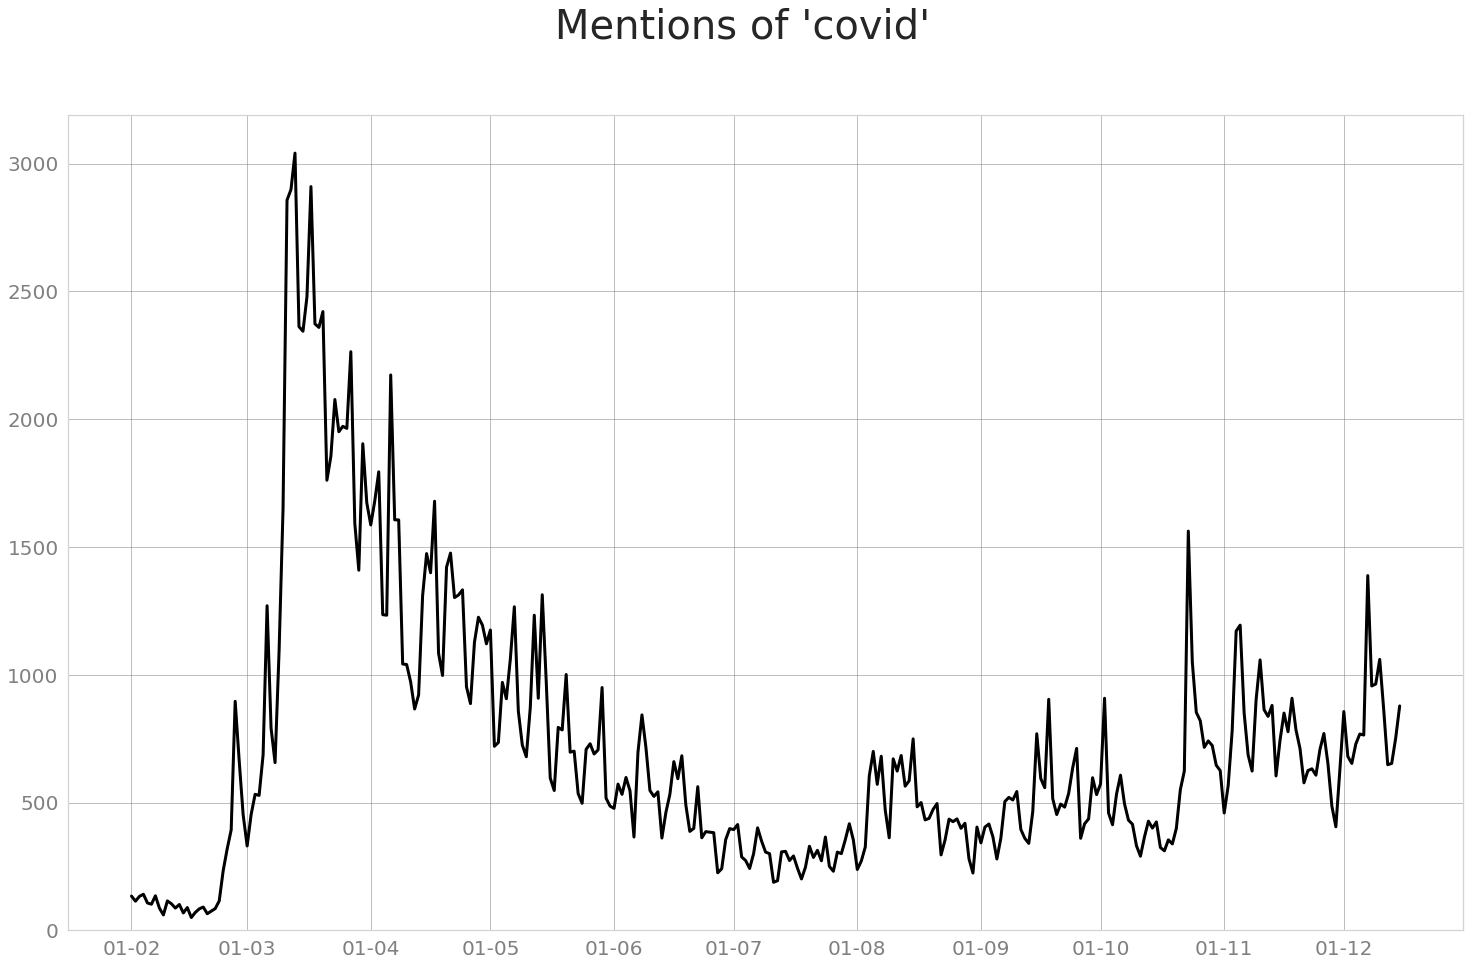

In [25]:
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('xtick', labelsize=20)


themes.theme_minimal(grid=False, ticks=False, fontsize=18)
a4_dims = (25,15) #(11.7, 8.27)

palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

fig, (ax1) = plt.subplots(1,1, figsize=a4_dims)
sns.set(font_scale = 2)


ax2 = sns.lineplot(x="date", y="nr_of_tweets", 
                  #color = palette[1], 
                   #alpha = 0.30,
                     linewidth = 3, data = df)


ax1.set(xlabel="", ylabel = "")
ax1.xaxis.get_label().set_fontsize(40)
ax1.yaxis.get_label().set_fontsize(40)

ax1.grid(color='grey', linestyle='-', linewidth=0.5, which= "both")

# Define the date format
ax1.xaxis_date()
date_form = mdates.DateFormatter("%d-%m")
ax1.xaxis.set_major_formatter(date_form)

ax1.set(ylim=(0, None))
name = "Mentions of " + "'covid'"
fig.suptitle(name, size = "40")

#plot_name = "fig/all_vaccin_mentions_winter.png"
#fig.savefig(plot_name)

fig.show()

/home/commando/maris/lib/python3.6/site-packages/ipykernel_launcher.py:33: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
/home/commando/maris/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.


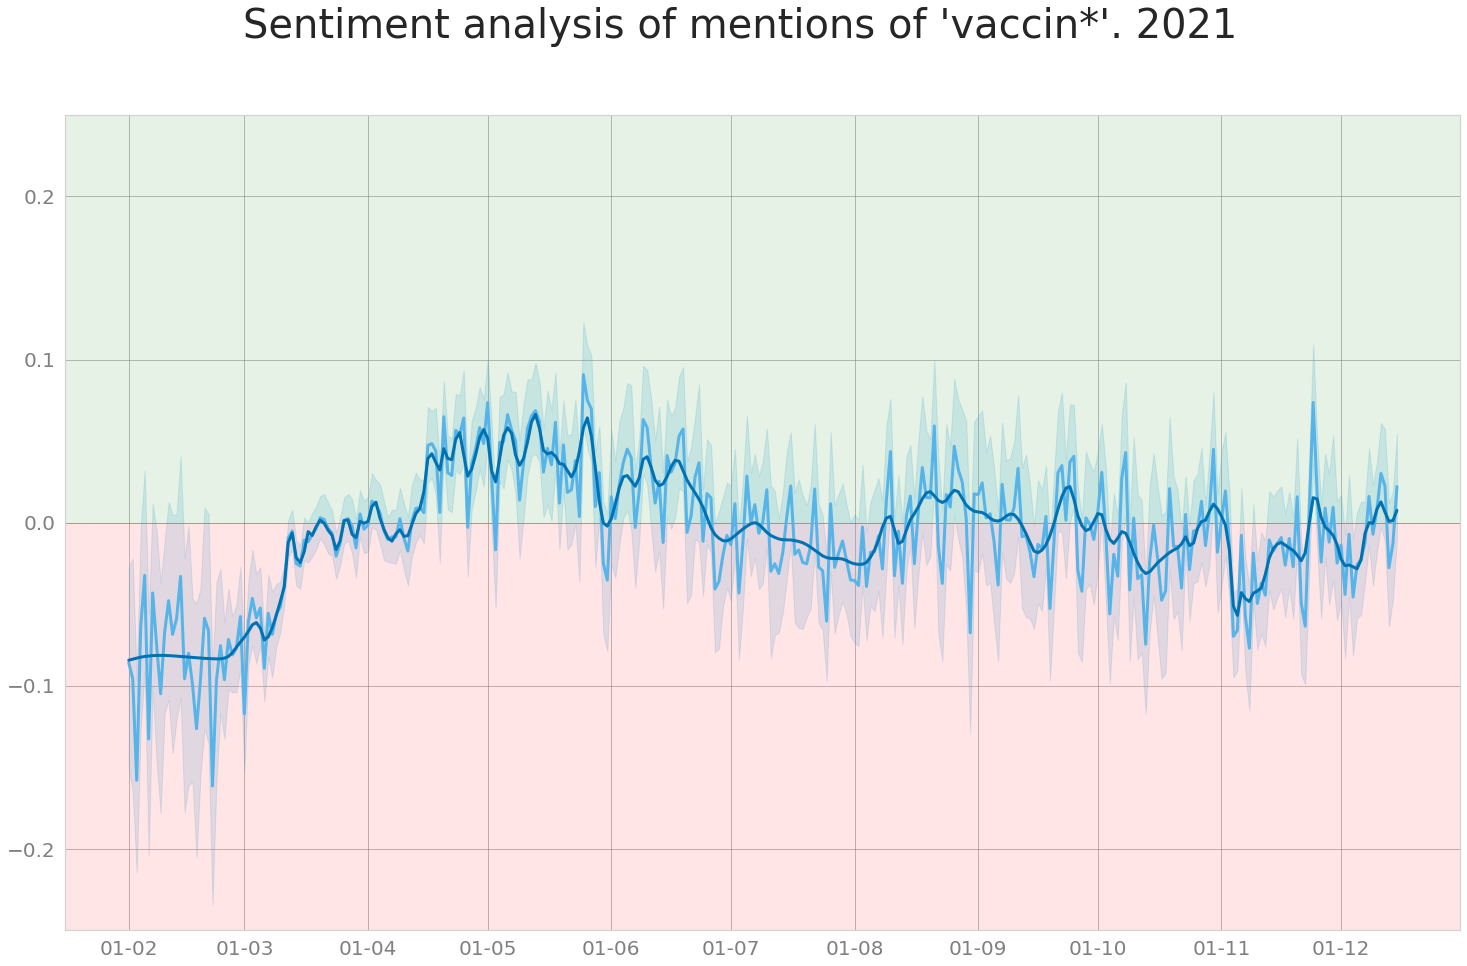

In [10]:
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('xtick', labelsize=20)


themes.theme_minimal(grid=False, ticks=False, fontsize=18)
a4_dims = (25,15) #(11.7, 8.27)
palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

fig, (ax1) = plt.subplots(1,1, figsize=a4_dims)
sns.set(font_scale = 2)

ax1 = sns.lineplot(x="date", y="centered_compound", 
                   label="Daily", color = palette[2],
                   #alpha = 0.30,
                     linewidth = 3, data = df)

ax1 = sns.lineplot(x="date", y="smooth_compound", 
                   label="Smoothed", color = palette[5],
                     linewidth = 3, data = df)

ax1.set(xlabel="", ylabel = "")
ax1.xaxis.get_label().set_fontsize(40)
ax1.yaxis.get_label().set_fontsize(40)

ax1.grid(color='grey', linestyle='-', linewidth=0.5, which= "both")

# Define the date format
ax1.xaxis_date()
date_form = mdates.DateFormatter("%d-%m")
ax1.xaxis.set_major_formatter(date_form)

# Color the bg
plt.axhspan(0, 0.25, color = "green", facecolor='0.2', alpha=0.1)
plt.axhspan(0, -0.25, color = "red", facecolor='0.2', alpha=0.1)


fig.suptitle("Sentiment analysis of mentions of 'vaccin*'. 2021", size = "40")
#ax1.set_title('Level 1', fontsize=30)

ax1.legend_.remove()
ax1.set(ylim=(-0.25, 0.25))

#plot_name = "fig/sentiment_compound_winter.png"
#ig.savefig(plot_name)

fig.show()

In [11]:
# Calculate entropy per day
import numpy as np
import math
from collections import Counter

def entropy2(labels, base=None):
    """ Computes entropy of label distribution. """

    n_labels = len(labels)

    if n_labels <= 1:
        return 0

    value,counts = np.unique(labels, return_counts=True)
    probs = counts / n_labels
    n_classes = np.count_nonzero(probs)

    if n_classes <= 1:
        return 0

    ent = 0.

    # Compute entropy
    base = math.e if base is None else base
    for i in probs:
        ent -= i * math.log(i, base)

    return ent


#entropy_df = winter_df.set_index(pd.to_datetime(winter_df['created_at'], utc = True))
#entropy_df = entropy_df.sort_values("date")

#entropy = []
#day = []
#for u,v in entropy_df.groupby(pd.Grouper(freq="D")):
#    ent = entropy2(v['centered_compound'])
    
    #print("Day", u)
    #print(ent)
    
#    entropy.append(ent)
#    day.append(u)

In [12]:
#entropy_df = pd.DataFrame(entropy, day).reset_index().rename(columns={"index":"day", 0:"entropy"})
#entropy_df["day"] = pd.to_datetime(entropy_df["day"], utc=True).dt.strftime('%Y-%m-%d')
#winter_df["day"] = pd.to_datetime(winter_df["created_at"], utc=True).dt.strftime('%Y-%m-%d')

In [13]:
#winter_df = pd.merge(winter_df, entropy_df, on= "day")

In [14]:
#min_entropy = min(winter_df["entropy"])
#max_entropy = max(winter_df["entropy"])
#difference = max_entropy - min_entropy

#winter_df["normalized_entropy"] = (winter_df["entropy"] - min_entropy) / difference
#average_entropy = sum(winter_df["normalized_entropy"]) / len(winter_df["normalized_entropy"])
#winter_df["centered_entropy"] = winter_df["normalized_entropy"] - average_entropy

In [15]:
# Smooth entropy
#winter_df["smooth_entropy"] = gaussian_kernel(winter_df["entropy"], sigma = 1, fwhm = 2000)

In [16]:
def get_tweet_frequencies(df):
    tweet_freq = pd.DataFrame({'nr_of_tweets' : df.groupby(['date']).size()}).reset_index()
    freq_tweets = pd.merge(df, tweet_freq, how='left', on=['date'])#, 'id', 'created_at'])
    return freq_tweets

df = get_tweet_frequencies(df)
df["date"] = pd.to_datetime(df["date"])

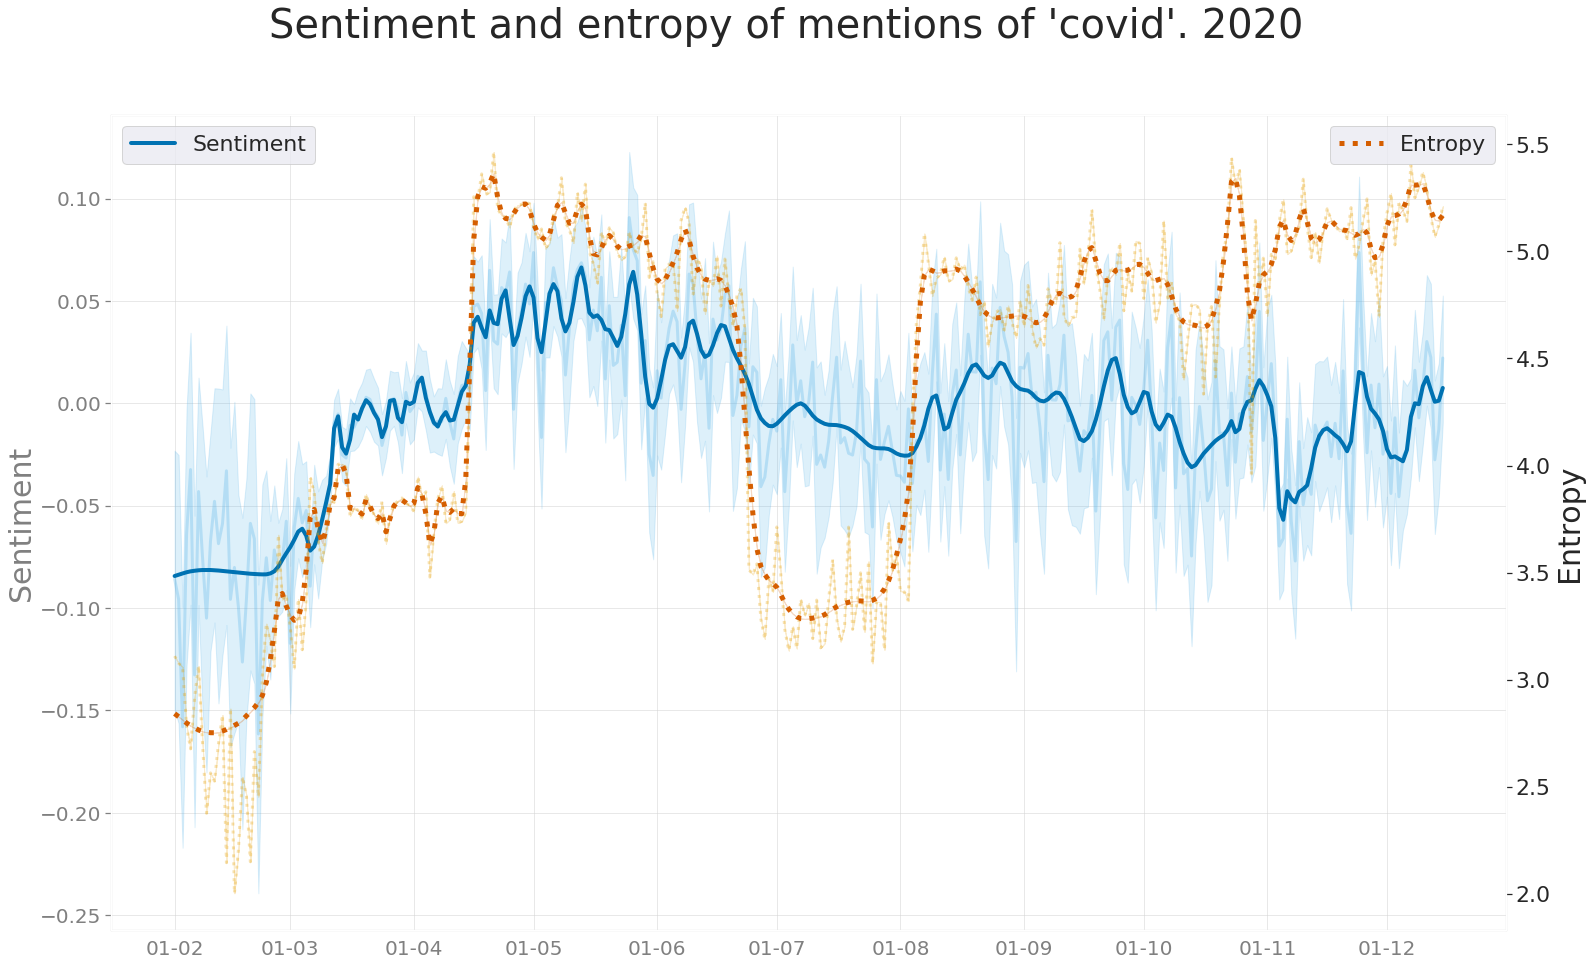

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('xtick', labelsize=20)

themes.theme_minimal(grid=False, ticks=False, fontsize=18)
a4_dims = (25,15) #(11.7, 8.27)
#          0 black      1 orange  2 L blue   3 green    4 L orange  5 D blue  6 D orange 7 purple
palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

fig, (ax1) = plt.subplots(1,1, figsize=a4_dims)
sns.set(font_scale = 2)

ax1 = sns.lineplot(x="date", y="centered_compound", 
                   #label="", 
                   color = palette[2],
                   alpha = 0.30,
                     linewidth = 3, data = df)

ax1 = sns.lineplot(x="date", y="smooth_compound", 
                   label="Sentiment", 
                   color = palette[5],
                     linewidth = 4, data = df)

#x_coordinates = dates_df["date"]
#y_coordinates = dates_df["smooth_compound2"]

#plt.scatter(x_coordinates, y_coordinates, color="none", edgecolor="red",
#           s = 500, linewidths = 3) 


#ax1 = sns.scatterplot(x="date", y="smooth_compound2",
#                      s = 500, marker = "o",
#                      #facecolors='none', 
#                      edgecolors='red',
#                      color = palette[0],
#                     data = dates_df, ax = ax1)

    
#plt.axvline(dt.datetime(2021, 1, 1), color="grey")

# Color the bg
#plt.axhspan(0, 0.15, color = "green", facecolor='0.2', alpha=0.1)
#plt.axhspan(0, -0.15, color = "red", facecolor='0.2', alpha=0.1)


# 'solid', 'dashed', 'dashdot', 'dotted'
ax2 = ax1.twinx()
ax2 = sns.lineplot(x="date", y="entropy", 
                   #label="Daily", 
                   color = palette[1],
                   alpha = 0.30,
                     linewidth = 3, 
                   linestyle = "dotted",
                   data = df)


ax1.set(xlabel="", ylabel = "Sentiment")
ax1.xaxis.get_label().set_fontsize(30)
ax1.yaxis.get_label().set_fontsize(30)
ax2.set(xlabel="", ylabel = "Entropy")
ax2.xaxis.get_label().set_fontsize(30)
ax2.yaxis.get_label().set_fontsize(30)

ax1.grid(linestyle='-', linewidth=0.5, which= "both")
ax2.grid(False)

# Define the date format
ax1.xaxis_date()
date_form = mdates.DateFormatter("%d-%m")
ax1.xaxis.set_major_formatter(date_form)

ax2 = sns.lineplot(x="date", y="smooth_entropy", 
                   label="Entropy", 
                   color = palette[6],
                   #alpha = 0.30,
                   linestyle = "dotted",
                     linewidth = 5, data = df)


fig.suptitle("Sentiment and entropy of mentions of 'covid'. 2020", size = "40")

ax1.legend(loc=2)
#plt.legend(markers, numpoints=1)

ax2.legend(loc=1)

#plot_name = "covid_sentiment_compound_entropy_winter.png"
#fig.savefig(plot_name)

fig.show()

In [7]:
# Add important dates as scatterplot
winter_df
dates = ["2020-12-21", "2020-12-27", 
         "2021-01-06", "2021-01-29",
        "2021-03-11", "2021-03-25", "2021-04-14"]
labels = ["Pfizer godkendt", "Vaccinationer påbegyndes",
         "Moderna godkendt", "AstraZeneca (AZ) godkendt",
         "AZ på pause", "AZ pause forlænges", "AZ udgår"]
labels = ["Pfizer approved", "Vaccinations begin",
         "Moderna approved", "AstraZeneca (AZ) approved",
         "AZ halted", "AZ further halted", "AZ withdrawn"]

dates_df = winter_df[winter_df["date"].isin(dates)]

In [8]:
dates_df = dates_df.groupby("date").mean().reset_index()
dates_df["labels"] = labels
dates_df["date"] = pd.to_datetime(dates_df["date"])
dates_df["date1"] = pd.DatetimeIndex(dates_df.date) + pd.DateOffset(1)

pos_dates_df = dates_df[0:4]
neg_dates_df = dates_df[4:].reset_index(drop=True)

In [9]:
neg_dates_df

,date,index,id,dupe50,neg,neu,pos,compound,sentida_sentiment,afinn_sentiment,...,centered_compound,centered_sentida,normalized_afinn,centered_afinn,smooth_compound2,entropy,smooth_entropy,nr_of_tweets,labels,date1
0,2021-03-11,73418.470120,1.370010e+18,False,0.076098,0.836373,0.087508,-0.008075,0.010052,-0.370518,...,-0.074450,-0.025977,0.514988,-0.008867,-0.064850,5.408284,5.334922,1506.0,AZ halted,2021-03-12
1,2021-03-25,82469.698031,1.375079e+18,False,0.065531,0.839357,0.095128,0.061001,0.029532,-0.043764,...,-0.005373,-0.006497,0.522768,-0.001088,-0.021457,5.264265,5.141793,914.0,AZ further halted,2021-03-26
2,2021-04-14,92181.708880,1.382341e+18,False,0.074463,0.834215,0.091330,0.021423,0.015498,-0.236293,...,-0.044951,-0.020530,0.518183,-0.005672,-0.042485,5.827971,5.761341,2590.0,AZ withdrawn,2021-04-15


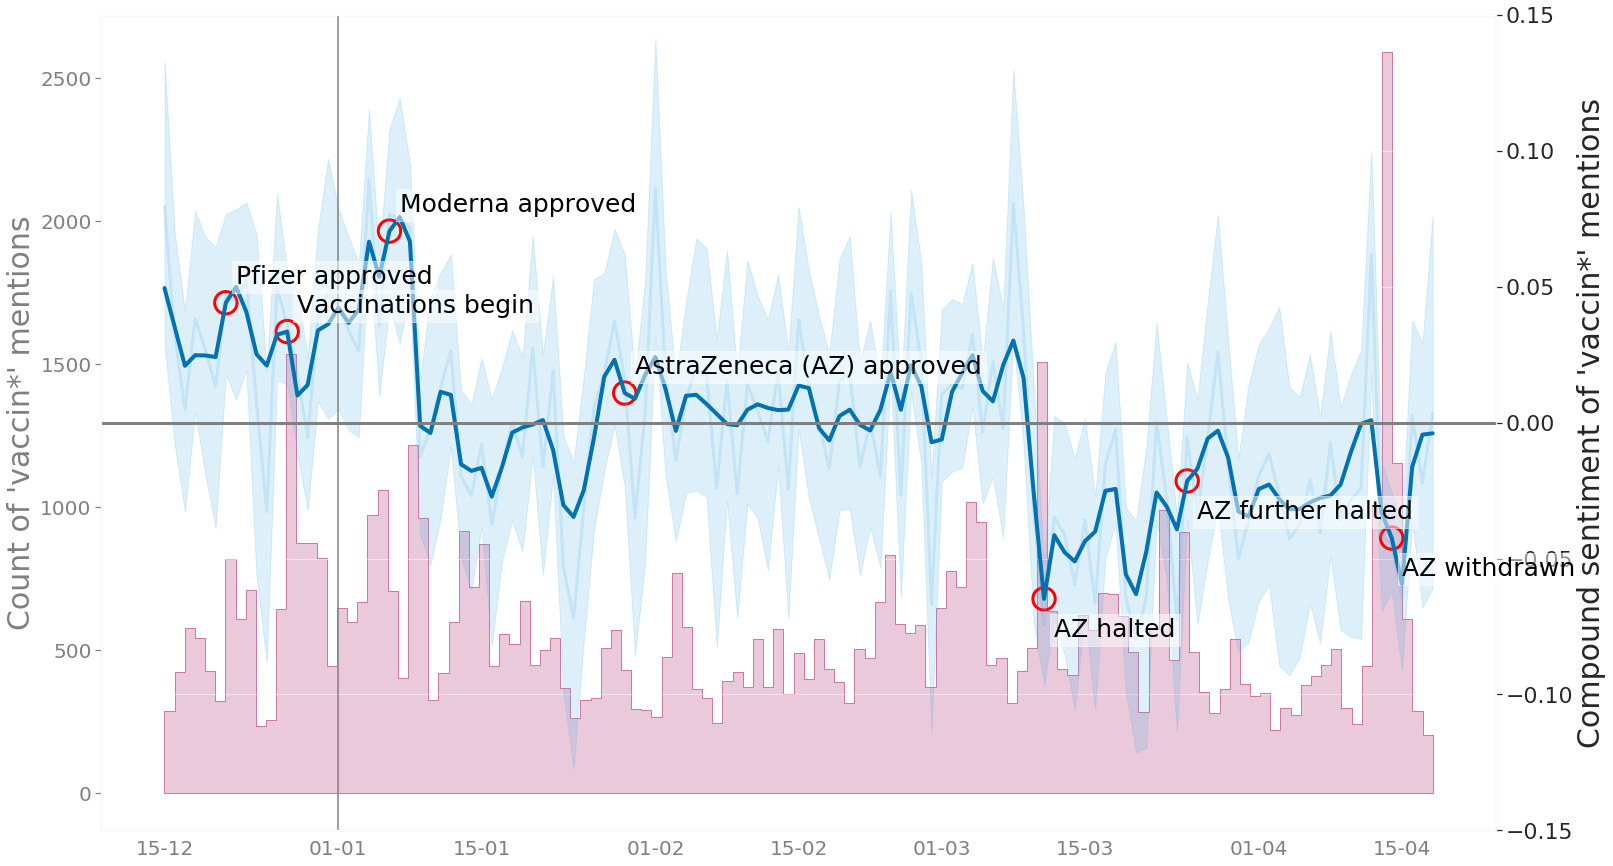

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('xtick', labelsize=20)

themes.theme_minimal(grid=False, ticks=False, fontsize=18)
a4_dims = (25,15) #(11.7, 8.27)
#          0 black      1 orange  2 L blue   3 green    4 L orange  5 D blue  6 D orange 7 purple
palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

fig, (ax0) = plt.subplots(1,1, figsize=a4_dims)
sns.set(font_scale = 2)

ax0 = sns.histplot(x="date", alpha = 0.4,
                   color = palette[7],
                   bins = len(winter_df["date"].unique()), element="step",
                  data = winter_df)

ax0.xaxis_date()
date_form = mdates.DateFormatter("%d-%m")
ax0.xaxis.set_major_formatter(date_form)

ax1 = ax0.twinx()

ax1 = sns.lineplot(x="date", y="centered_compound", 
                   color = palette[2],
                   alpha = 0.20,
                     linewidth = 3, data = winter_df)

ax1 = sns.lineplot(x="date", y="smooth_compound2", 
                   color = palette[5],
                     linewidth = 4, data = winter_df)

x_coordinates = dates_df["date"]
y_coordinates = dates_df["smooth_compound2"]

plt.scatter(x_coordinates, y_coordinates, color="none", edgecolor="red",
           s = 500, linewidths = 3) 

for i in range(pos_dates_df.shape[0]):
    plt.text(x = pos_dates_df.date1[i], y = pos_dates_df.smooth_compound2[i]+0.007,
             s = pos_dates_df.labels[i],
             fontdict = dict(color=palette[0],size=25),
             bbox = dict(facecolor="white",alpha=0.5))
    
for i in range(neg_dates_df.shape[0]):
    plt.text(x = neg_dates_df.date1[i], y = neg_dates_df.smooth_compound2[i]-0.014,
             s = neg_dates_df.labels[i],
             fontdict = dict(color=palette[0],size=25),
             bbox = dict(facecolor="white",alpha=0.5))#palette[3]
    
plt.axvline(dt.datetime(2021, 1, 1), color="grey")
plt.axhline(0, color="grey", linewidth = 3)

ax1.set(xlabel="", ylabel = "Compound sentiment of 'vaccin*' mentions")
ax1.xaxis.get_label().set_fontsize(30)
ax1.yaxis.get_label().set_fontsize(30)
ax0.set(xlabel="", ylabel = "Count of 'vaccin*' mentions")
ax0.xaxis.get_label().set_fontsize(30)
ax0.yaxis.get_label().set_fontsize(30)

ax1.grid(linestyle='-', linewidth=0.5, which= "both")

# Define the date format
ax1.xaxis_date()
date_form = mdates.DateFormatter("%d-%m")
ax1.xaxis.set_major_formatter(date_form)

#ax0.set(ylim=(0, 5000))
ax1.set(ylim=(-0.15, 0.15))


plot_name = "fig/sentiment_compound_labelled_winter.png"
fig.savefig(plot_name, bbox="tight", dpi=300)

fig.show()

/home/commando/maris/lib/python3.6/site-packages/ipykernel_launcher.py:60: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
/home/commando/maris/lib/python3.6/site-packages/ipykernel_launcher.py:61: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.


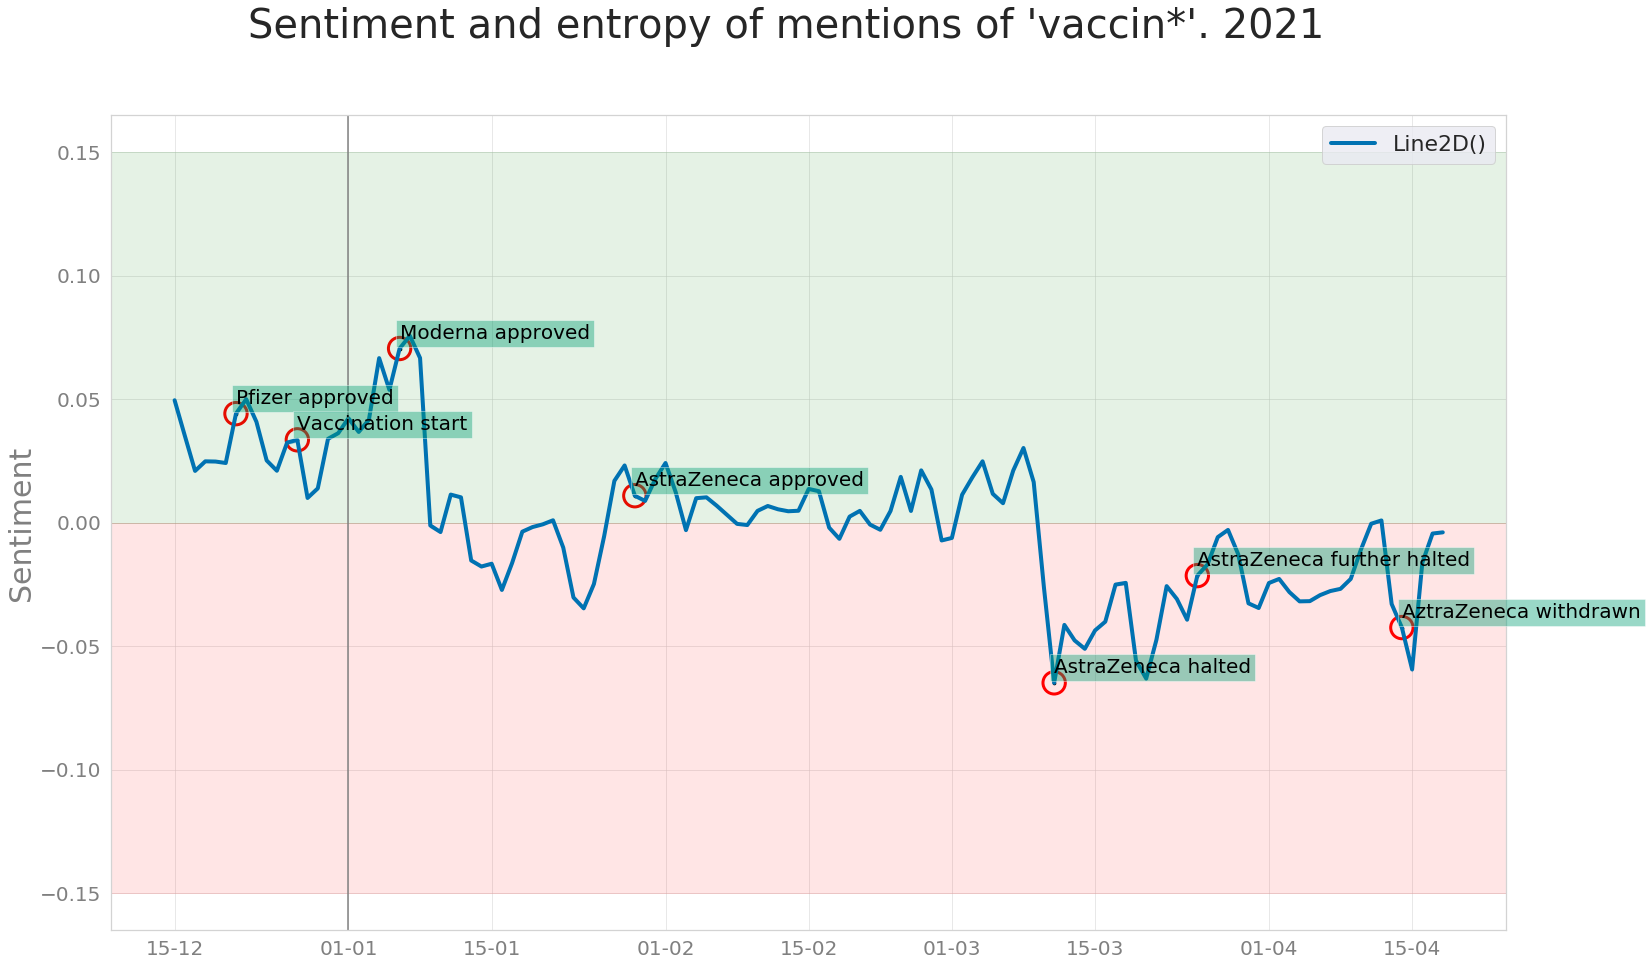

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('xtick', labelsize=20)

themes.theme_minimal(grid=False, ticks=False, fontsize=18)
a4_dims = (25,15) #(11.7, 8.27)
#          0 black      1 orange  2 L blue   3 green    4 L orange  5 D blue  6 D orange 7 purple
palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

fig, (ax1) = plt.subplots(1,1, figsize=a4_dims)
sns.set(font_scale = 2)

#ax1 = sns.lineplot(x="date", y="centered_compound", 
#                   #label="", 
#                   color = palette[2],
#                   alpha = 0.30,
#                     linewidth = 3, data = winter_df)

ax1 = sns.lineplot(x="date", y="smooth_compound2", 
                   label="Sentiment", 
                   color = palette[5],
                     linewidth = 4, data = winter_df)

x_coordinates = dates_df["date"]
y_coordinates = dates_df["smooth_compound2"]

plt.scatter(x_coordinates, y_coordinates, color="none", edgecolor="red",
           s = 500, linewidths = 3) 


#ax1 = sns.scatterplot(x="date", y="smooth_compound2",
#                      s = 500, marker = "o",
#                      #facecolors='none', 
#                      edgecolors='red',
#                      color = palette[0],
#                     data = dates_df, ax = ax1)

plt.scatter(x="date",y="smooth_compound2", marker = "o", s=7,
            #markeredgewidth=1,markeredgecolor="g",
            #markerfacecolor="None", 
            data = dates_df)

markers = [plt.Line2D([0,0],[0,0], markeredgecolor="red",
                      marker='o', markerfacecolor='none',
                      mew=0.3,
                      linestyle='')]
           # for key in pal]

for i in range(dates_df.shape[0]):
    plt.text(x=dates_df.date[i],y=dates_df.smooth_compound2[i]+0.004,
             s=dates_df.labels[i],
             fontdict=dict(color=palette[0],size=20),
             bbox=dict(facecolor=palette[3],alpha=0.4))
    
plt.axvline(dt.datetime(2021, 1, 1), color="grey")

# Color the bg
plt.axhspan(0, 0.15, color = "green", facecolor='0.2', alpha=0.1)
plt.axhspan(0, -0.15, color = "red", facecolor='0.2', alpha=0.1)


# 'solid', 'dashed', 'dashdot', 'dotted'
#ax2 = ax1.twinx()
#ax2 = sns.lineplot(x="date", y="entropy", 
#                   #label="Daily", 
#                   color = palette[1],
#                   alpha = 0.30,
#                     linewidth = 3, 
#                   linestyle = "dotted",
#                   data = winter_df)


ax1.set(xlabel="", ylabel = "Sentiment")
ax1.xaxis.get_label().set_fontsize(30)
ax1.yaxis.get_label().set_fontsize(30)
#ax2.set(xlabel="", ylabel = "Entropy")
#ax2.xaxis.get_label().set_fontsize(30)
#ax2.yaxis.get_label().set_fontsize(30)

ax1.grid(linestyle='-', linewidth=0.5, which= "both")
#ax2.grid(False)

# Define the date format
ax1.xaxis_date()
date_form = mdates.DateFormatter("%d-%m")
ax1.xaxis.set_major_formatter(date_form)

#ax2 = sns.lineplot(x="date", y="smooth_entropy", 
#                   label="Entropy", 
#                   color = palette[6],
#                   #alpha = 0.30,
#                   linestyle = "dotted",
#                     linewidth = 5, data = winter_df)


fig.suptitle("Sentiment and entropy of mentions of 'vaccin*'. 2021", size = "40")

ax1.legend(loc=2)
plt.legend(markers, numpoints=1)

#ax2.legend(loc=1)

plot_name = "fig/sentiment_compound_entropy_winter.png"
fig.savefig(plot_name)

fig.show()

In [91]:
#winter_df.to_csv("winter_df_sent_entropy.csv", index=False)

In [95]:
wfreq_df = pd.read_csv("wfreq_df.csv")
wfreq_df["date"] = pd.to_datetime(wfreq_df["date"])

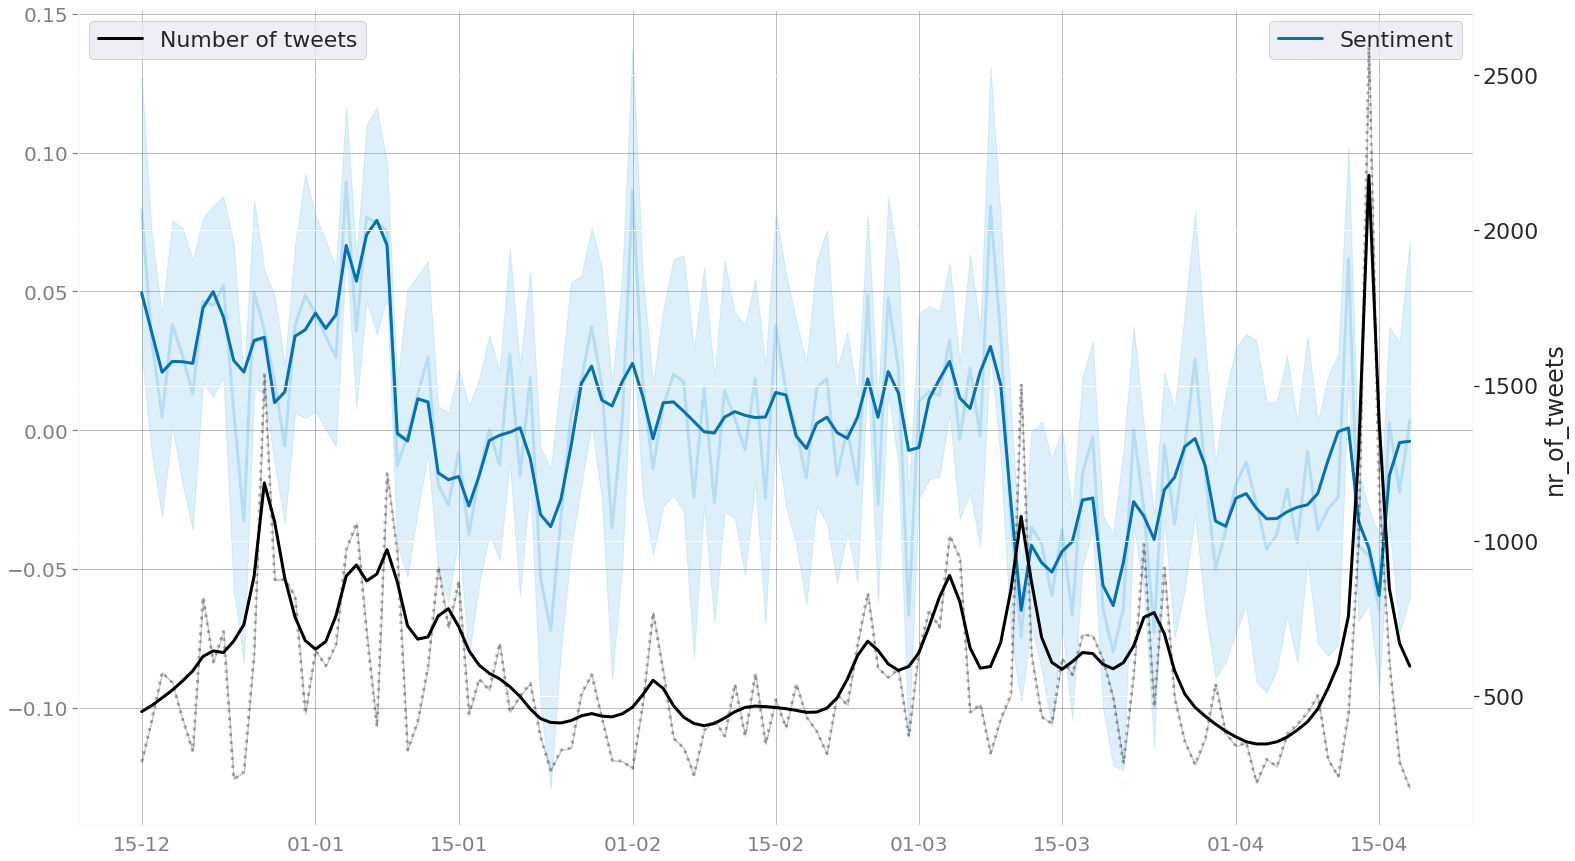

In [101]:
import pandas as pd
import matplotlib.pyplot as plt

matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('xtick', labelsize=20)


themes.theme_minimal(grid=False, ticks=False, fontsize=18)
a4_dims = (25,15) #(11.7, 8.27)
#          0 black      1 orange  2 L blue   3 green    4 L orange  5 D blue  6 D orange 7 purple
palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

fig, (ax1) = plt.subplots(1,1, figsize=a4_dims)
sns.set(font_scale = 2)
#ax1 = sns.lineplot(x="date", y="compound", 
#                   label="Daily", color = palette[2],
#                     linewidth = 3, data = winter_df)


ax1 = sns.lineplot(x="date", y="centered_compound", 
                   #label="", 
                   color = palette[2],
                   alpha = 0.30,
                     linewidth = 3, data = winter_df)

ax1 = sns.lineplot(x="date", y="smooth_compound2", 
                   label="Sentiment", 
                   color = palette[5],
                     linewidth = 3, data = winter_df)


# 'solid', 'dashed', 'dashdot', 'dotted'
ax2 = ax1.twinx()


ax2 = sns.lineplot(x="date", y="nr_of_tweets", 
                  color = palette[0], 
                   linestyle = "dotted",
                   alpha = 0.30,
                   #label = "Number of tweets",
                     linewidth = 3, data = wfreq_df)

ax2 = sns.lineplot(x="date", y="smooth", 
                  color = palette[0], 
                   label = "Number of tweets",
                   #linestyle="dotted",
                     linewidth = 3, data = wfreq_df)


ax1.set(xlabel="", ylabel = "")
ax1.xaxis.get_label().set_fontsize(40)
ax1.yaxis.get_label().set_fontsize(40)

ax1.grid(color='grey', linestyle='-', linewidth=0.5, which= "both")

# Define the date format
ax1.xaxis_date()
date_form = mdates.DateFormatter("%d-%m")
ax1.xaxis.set_major_formatter(date_form)

#fig.suptitle("Sentiment and entropy of mentions of 'vaccin*'. 2021", size = "40")
#plot_name = "fig/sentiment_compound_entropy_winter.png"
#fig.savefig(plot_name)

fig.show()

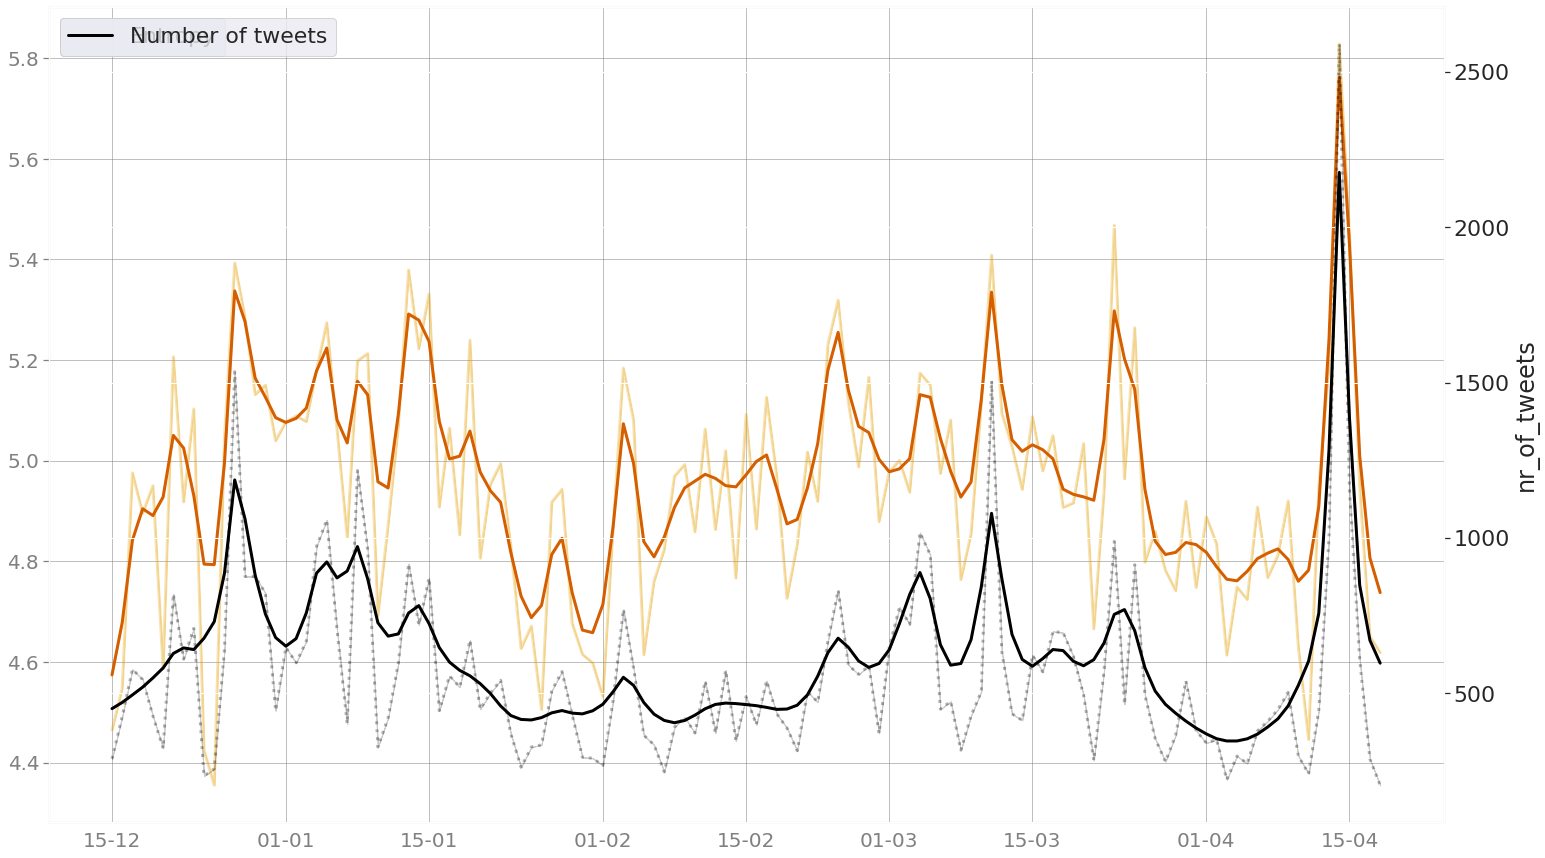

In [102]:
import pandas as pd
import matplotlib.pyplot as plt

matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('xtick', labelsize=20)


themes.theme_minimal(grid=False, ticks=False, fontsize=18)
a4_dims = (25,15) #(11.7, 8.27)
#          0 black      1 orange  2 L blue   3 green    4 L orange  5 D blue  6 D orange 7 purple
palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

fig, (ax1) = plt.subplots(1,1, figsize=a4_dims)
sns.set(font_scale = 2)
#ax1 = sns.lineplot(x="date", y="compound", 
#                   label="Daily", color = palette[2],
#                     linewidth = 3, data = winter_df)


ax1 = sns.lineplot(x="date", y="entropy", 
                   #label="", 
                   color = palette[1],
                   alpha = 0.30,
                     linewidth = 3, data = winter_df)

ax1 = sns.lineplot(x="date", y="smooth_entropy", 
                   label="Entropy", 
                   color = palette[6],
                     linewidth = 3, data = winter_df)


# 'solid', 'dashed', 'dashdot', 'dotted'
ax2 = ax1.twinx()


ax2 = sns.lineplot(x="date", y="nr_of_tweets", 
                  color = palette[0], 
                   linestyle = "dotted",
                   alpha = 0.30,
                   #label = "Number of tweets",
                     linewidth = 3, data = wfreq_df)

ax2 = sns.lineplot(x="date", y="smooth", 
                  color = palette[0], 
                   label = "Number of tweets",
                   #linestyle="dotted",
                     linewidth = 3, data = wfreq_df)


ax1.set(xlabel="", ylabel = "")
ax1.xaxis.get_label().set_fontsize(40)
ax1.yaxis.get_label().set_fontsize(40)

ax1.grid(color='grey', linestyle='-', linewidth=0.5, which= "both")

# Define the date format
ax1.xaxis_date()
date_form = mdates.DateFormatter("%d-%m")
ax1.xaxis.set_major_formatter(date_form)

#fig.suptitle("Sentiment and entropy of mentions of 'vaccin*'. 2021", size = "40")
#plot_name = "fig/sentiment_compound_entropy_winter.png"
#fig.savefig(plot_name)

fig.show()

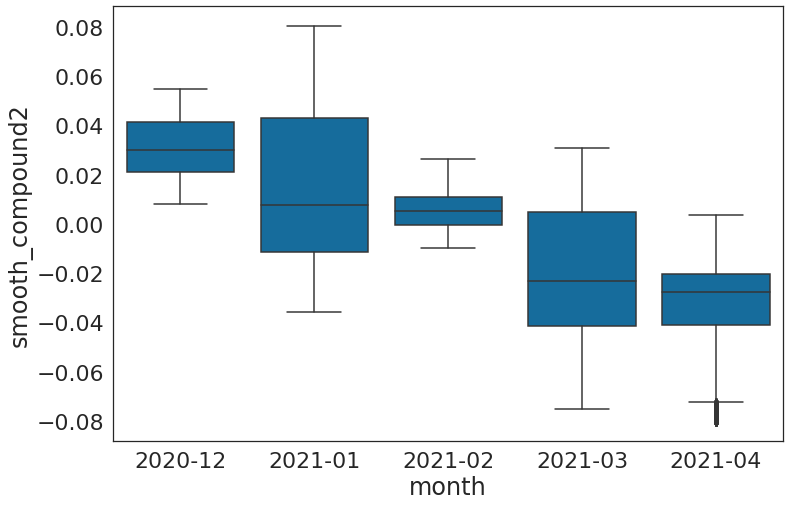

In [88]:
sns.set_style("white")
winter_df["month"] = pd.to_datetime(winter_df["created_at"], utc=True).dt.strftime('%Y-%m')
sns.boxplot(x = 'month', y='smooth_compound2', data = winter_df, color = palette[5]);

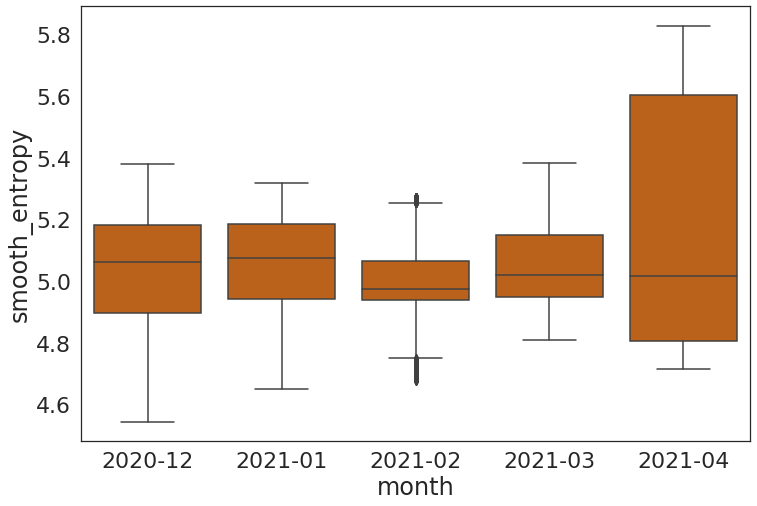

In [89]:
sns.set_style("white")
winter_df["month"] = pd.to_datetime(winter_df["created_at"], utc=True).dt.strftime('%Y-%m')
sns.boxplot(x = 'month', y='smooth_entropy', data = winter_df, color = palette[6]);

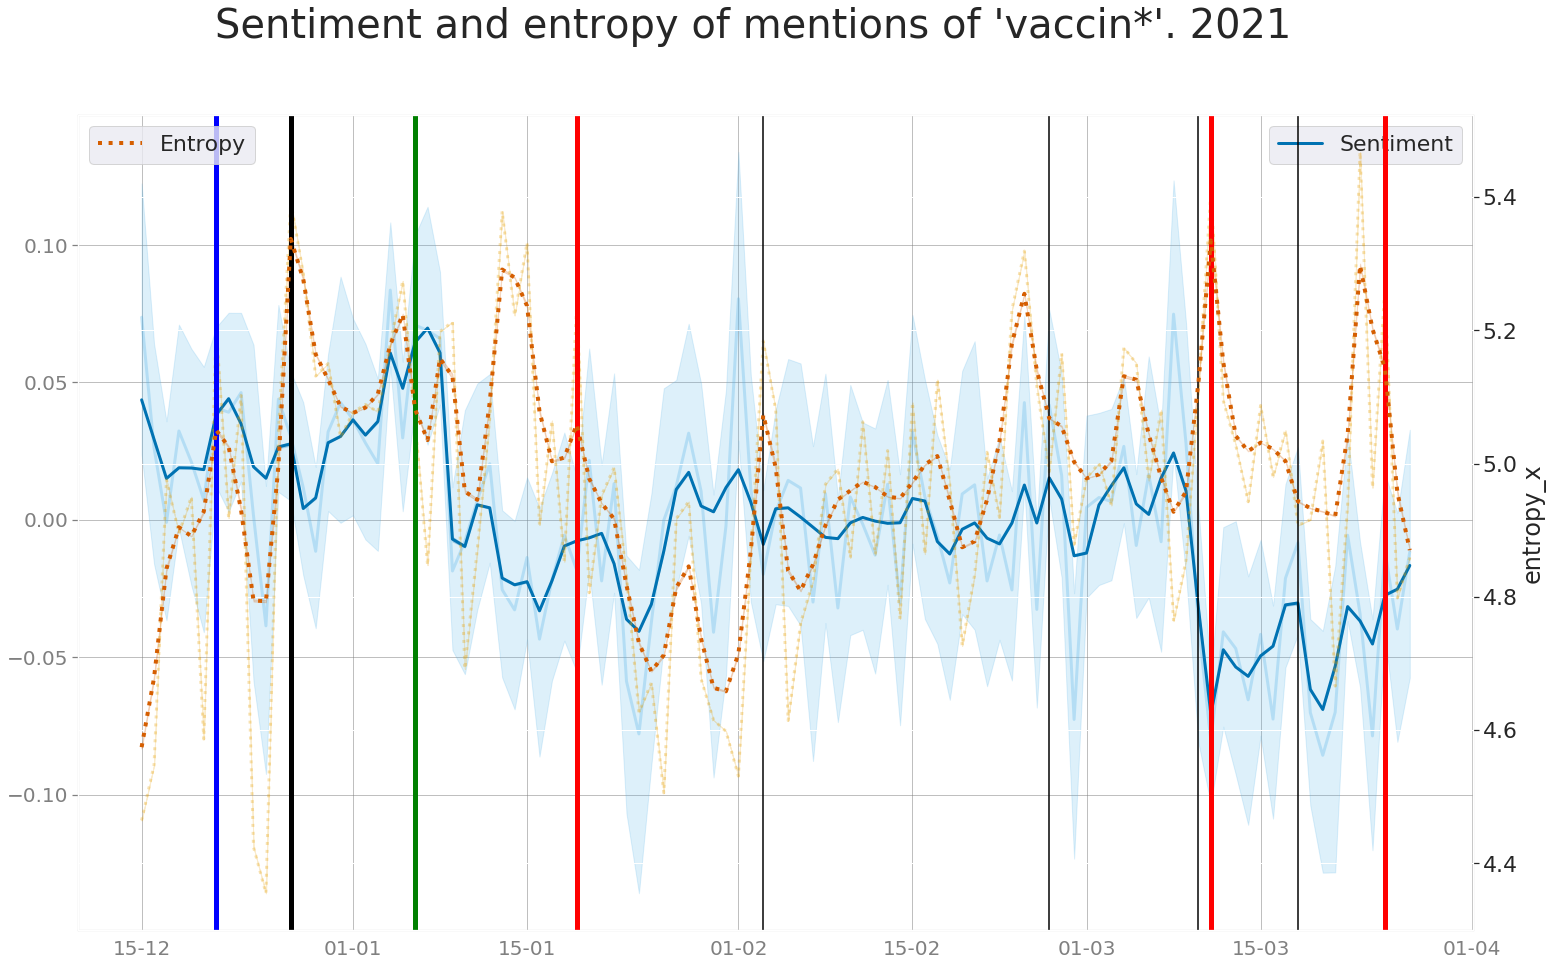

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('xtick', labelsize=20)


themes.theme_minimal(grid=False, ticks=False, fontsize=18)
a4_dims = (25,15) #(11.7, 8.27)
#          0 black      1 orange  2 L blue   3 green    4 L orange  5 D blue  6 D orange 7 purple
palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

fig, (ax1) = plt.subplots(1,1, figsize=a4_dims)
sns.set(font_scale = 2)
#ax1 = sns.lineplot(x="date", y="compound", 
#                   label="Daily", color = palette[2],
#                     linewidth = 3, data = winter_df)


ax1 = sns.lineplot(x="date", y="centered_compound", 
                   #label="", 
                   color = palette[2],
                   alpha = 0.30,
                     linewidth = 3, data = winter_df)

ax1 = sns.lineplot(x="date", y="smooth_compound2", 
                   label="Sentiment", 
                   color = palette[5],
                     linewidth = 3, data = winter_df)


# 'solid', 'dashed', 'dashdot', 'dotted'
ax2 = ax1.twinx()
ax2 = sns.lineplot(x="date", y="entropy_x", 
                   #label="Daily", 
                   color = palette[1],
                   alpha = 0.30,
                     linewidth = 3, 
                   linestyle = "dotted",
                   data = winter_df)


ax1.set(xlabel="", ylabel = "")
ax1.xaxis.get_label().set_fontsize(40)
ax1.yaxis.get_label().set_fontsize(40)

ax1.grid(color='grey', linestyle='-', linewidth=0.5, which= "both")

# Define the date format
ax1.xaxis_date()
date_form = mdates.DateFormatter("%d-%m")
ax1.xaxis.set_major_formatter(date_form)

# Color the bg
#plt.axhspan(0, 0.25, color = "green", facecolor='0.2', alpha=0.1, ax=ax1)
#plt.axhspan(0, -0.25, color = "red", facecolor='0.2', alpha=0.1, ax=ax1)

#highlighted
plt.axvline(dt.datetime(2020, 12, 21), color="blue", linewidth=5)#palette[5])
plt.axvline(dt.datetime(2020, 12, 27), color="black", linewidth=5)#palette[5])
plt.axvline(dt.datetime(2021, 1, 6), color="green", linewidth=5)#palette[5])
plt.axvline(dt.datetime(2021, 1, 19), color="red", linewidth=5)#palette[5])
plt.axvline(dt.datetime(2021, 3, 11), color="red", linewidth=5)#palette[5])
plt.axvline(dt.datetime(2021, 3, 25), color="red", linewidth=5)#palette[5])
plt.axvline(dt.datetime(2021, 3, 11), color="red", linewidth=5)#palette[5])

#extra
plt.axvline(dt.datetime(2021, 2, 3), color="black")#palette[5])
plt.axvline(dt.datetime(2021, 2, 26), color="black")#palette[5])
plt.axvline(dt.datetime(2021, 3, 10), color="black")#palette[5])
plt.axvline(dt.datetime(2021, 3, 18), color="black")#palette[5])


#plt.text(x = dt.datetime(2021, 3, 12), # x-coordinate position of data label, adjusted to be 3 right of the data point
# y = 0.2, #winter_df[winter_df["date"] == "2021-03-11"]["compound"].reset_index(drop=True)[0], # y-coordinate position of data label, to take max height 
# s = 'AstraZeneca halted', # data label
# color = palette[5])

#plt.axvline(dt.datetime(2020, 12, 27), color=palette[5])
#plt.text(x = dt.datetime(2020, 12, 28), # x-coordinate position of data label, adjusted to be 3 right of the data point
# y = 0.15, #winter_df[winter_df["date"] == "2021-03-11"]["compound"].reset_index(drop=True)[0], # y-coordinate position of data label, to take max height 
# s = 'First vaccinations', # data label
# color = palette[5])

ax2 = sns.lineplot(x="date", y="smooth_entropy", 
                   label="Entropy", 
                   color = palette[6],
                   #alpha = 0.30,
                   linestyle = "dotted",
                     linewidth = 4, data = winter_df)

fig.suptitle("Sentiment and entropy of mentions of 'vaccin*'. 2021", size = "40")
#ax1.set_title('Level 1', fontsize=30)

#ax1.legend_.remove()
#ax1.set(ylim=(-0.25, 0.25))

plot_name = "fig/sentiment_compound_entropy_winter.png"
fig.savefig(plot_name)

fig.show()

In [38]:
winter_df.sort_values("smooth_compound2").drop_duplicates("date")[0:10]

,index,created_at,id,text,search_keyword,date,mentioneless_text,text50,dupe50,neg,...,compound_7day_ave,centered_compound,centered_sentida,normalized_afinn,centered_afinn,day,entropy_x,smooth_compound2,entropy_y,smooth_entropy
48754,73361,2021-03-11 12:31:01,1.369989e+18,"@Heunicke Kunne være interessant, at høre, hva...",['vaccin'],2021-03-11,"Kunne være interessant, at høre, hvad en såda...","Kunne være interessant, at høre, hvad en såda...",False,0.025,...,0.161571,0.691499,-0.015138,0.526316,0.051484,2021-03-11,5.408284,-0.081171,5.408284,5.383832
54323,79154,2021-03-20 08:51:45,1.373196e+18,@martinnorling2 @harley_lund @TomJensen1966 Me...,['vaccin'],2021-03-20,Men er de det? Jeg er helt med på at der s...,Men er de det? Jeg er helt med på at der s...,False,0.093,...,-0.040957,-0.588301,-0.006805,0.421053,-0.053779,2021-03-20,5.034004,-0.072455,5.034004,4.937444
54251,79082,2021-03-19 23:55:56,1.373061e+18,@JonasHerby Det er helt absurt at man bruger 3...,['vaccin'],2021-03-19,Det er helt absurt at man bruger 30-50mio om ...,Det er helt absurt at man bruger 30-50mio om ...,False,0.000,...,0.069886,0.736899,0.082084,0.631579,0.156748,2021-03-19,4.915979,-0.072093,4.915979,4.938981
54746,79602,2021-03-21 00:00:58,1.373424e+18,@AliSufiDK lægevidenskaben bliver heldigvis be...,['vaccin'],2021-03-21,lægevidenskaben bliver heldigvis bedre og klo...,lægevidenskaben bliver heldigvis bedre og klo...,False,0.000,...,0.143557,0.751399,0.250072,0.736842,0.262011,2021-03-21,4.666055,-0.061041,4.666055,4.915583
50758,75439,2021-03-14 12:08:50,1.371071e+18,@AndersGundelach @KarinVerland 1/ En test fang...,['vaccin'],2021-03-14,1/ En test fanger ikke alle smittede. Især i...,1/ En test fanger ikke alle smittede. Især i...,False,0.000,...,-0.025671,0.013399,-0.047083,0.236842,-0.237989,2021-03-14,4.942740,-0.057775,4.942740,5.016861
50633,75307,2021-03-13 23:48:00,1.370884e+18,@jyllandsposten Sut min pik. Jeg vil ALDRIG ta...,['vaccin'],2021-03-13,Sut min pik. Jeg vil ALDRIG tage den skide va...,Sut min pik. Jeg vil ALDRIG tage den skide va...,False,0.113,...,-0.273986,-0.608801,-0.001644,0.368421,-0.106410,2021-03-13,5.028114,-0.057184,5.028114,5.020622
48058,72636,2021-03-10 23:46:49,1.369797e+18,@Stine2010 @RosenkrantzT Og hvad gør dig sårba...,['vaccin'],2021-03-10,"Og hvad gør dig sårbar, og urolig for IKKE a...","Og hvad gør dig sårbar, og urolig for IKKE a...",False,0.330,...,-0.081186,-0.732801,-0.213749,0.368421,-0.106410,2021-03-10,5.112934,-0.054972,5.112934,5.229466
51047,75743,2021-03-15 00:14:11,1.371253e+18,@Wirlander @LiseAndersen6 Okey det er så ikke ...,['vaccin'],2021-03-15,Okey det er så ikke så lovende med mindre de...,Okey det er så ikke så lovende med mindre de...,False,0.000,...,-0.213800,-0.072301,-0.128749,0.526316,0.051484,2021-03-15,5.087446,-0.054838,5.087446,5.023352
49565,74200,2021-03-12 00:08:06,1.370165e+18,"Så faldt Venstre til patten. Så ved vi, at Ven...",['vaccin'],2021-03-12,"Så faldt Venstre til patten. Så ved vi, at Ven...","Så faldt Venstre til patten. Så ved vi, at Ven...",False,0.000,...,-0.184471,-0.072301,-0.051821,0.473684,-0.001147,2021-03-12,5.094396,-0.051972,5.094396,5.246185
56647,81571,2021-03-24 06:55:36,1.374616e+18,@bailey_hass @dybtuserioest @AliSufiDK Så skal...,['vaccin'],2021-03-24,Så skal der holdes corona party! Jeg troe...,Så skal der holdes corona party! Jeg troe...,False,0.153,...,-0.247414,-0.612601,-0.134922,0.394737,-0.080095,2021-03-24,4.964012,-0.047558,4.964012,5.235876


## R squared value

In [38]:
from sklearn.metrics import r2_score

avg_compound = df.groupby("date").mean("centered_compound").reset_index()["centered_compound"]
avg_sentida = df.groupby("date").mean("centered_sentida").reset_index()["centered_sentida"]

ic(r2_score(avg_compound, avg_sentida))


ic| r2_score(avg_compound, avg_sentida): 0.507717187267411


0.507717187267411

In [27]:
from sklearn.metrics import r2_score

#coefficient_of_dermination = 
ic(r2_score(avg_compound, avg_sentida))

ic(r2_score(df["centered_compound"], df["centered_sentida"]))
ic(r2_score(df["centered_sentida"], df["centered_compound"]))

ic(r2_score(df["centered_compound"], df["centered_afinn"]))
ic(r2_score(df["centered_compound"], df["normalized_afinn"]))
ic(r2_score(df["compound"], df["normalized_afinn"]))

ic| r2_score(avg_compound, avg_sentida): 0.48660690541157314
ic| r2_score(df["centered_compound"], df["centered_sentida"]): -0.07058358673082399
ic| r2_score(df["centered_sentida"], df["centered_compound"]): -12.214899960624193
ic| r2_score(df["centered_compound"], df["centered_afinn"]): -0.023248855211049912
ic| r2_score(df["centered_compound"], df["normalized_afinn"]): -1.1269809860202926
ic| r2_score(df["compound"], df["normalized_afinn"]): -0.8059487312276943


-0.8059487312276943

In [58]:
df["compound"]

22048   -0.4882
22049   -0.2500
22050    0.0000
22051    0.8221
22052    0.0857
          ...  
80861   -0.7580
80862    0.0000
80863    0.7804
80864   -0.3953
80865    0.1696
Name: compound, Length: 58818, dtype: float64

In [ ]:
# Data for knielbo
df0 = winter_df[["id", "created_at", "entropy", "centered_compound"]]
df1 = freq_df[["id", "created_at", "nr_of_tweets"]]

dff = pd.merge(df0, df1)

In [ ]:
dff.to_csv("sent_entropy_vaccines.csv", index = False, header = True)

In [50]:
winter_df[winter_df["date"] == "2021-03-22"].reset_index()["text"][0]

'@heldigt Ja det er ude af proportioner at massevaccinere millioner af raske for at redde få udsatte. Det gør vi jo heller ikke med influenza. I DK er der to ud af 140000 med AZ der er døde med blodprop. Norge er oppe på fire eller fem.'

In [53]:
for tweet in range(0, len(winter_df[winter_df["date"] == "2021-03-22"])):
    print(winter_df[winter_df["date"] == "2021-03-22"].reset_index()["text"][tweet])
    print(" ------- ")

@heldigt Ja det er ude af proportioner at massevaccinere millioner af raske for at redde få udsatte. Det gør vi jo heller ikke med influenza. I DK er der to ud af 140000 med AZ der er døde med blodprop. Norge er oppe på fire eller fem.
 ------- 
@tv2newsdk Folk dør af disse vacciner i hobe tal i USA. Men ingen snakker om det, hvorfor ikke? Billedet er fra CDC's hjemmeside. Kig selv, det er offentlig tilgængeligt materiale. https://t.co/AQMxTkB8YL
 ------- 
@TaniaGroth Ja Sikkerheden ved Turbo udviklet Lægemidler  Gør de fritages for Erstatning   Ved uheldige Udfald i Hjælpen til Menneske heden   Lige som Dem. Der stikker kanylen i Folk  Har mulighed for at sige. Det er jo frivilligt at blive vaccineret   Vis skyld kunne Placeres ville ingen
 ------- 
@BMccrawe Uha.... det bør du vaccineres i mod 🙃😄
 ------- 
@JonasHerby Det underlige er, at EMA først skulle godkende den, før vi kunne og måtte få den. Og nu godkender EMA så vaccinen en gang til, men det stoler vi så ikke helt på.😳
 ----

@mikaelmilhoj Ved du/man om danskere der tidligere har haft blodpropper vil kunne (“få lov til at”) vælge AstraZenica vaccinen fra her i DK hvis den (evt) genoptages?
 ------- 
@sgaarder @HaukLandsverk @KrosbyNatalia Det er derfor de er så tydelige på at det er meget sandsynlig at de som er vaccineret med AstraZeneca og (desværre) er afgået ved døden, er pga. vaccinen. Det er (igen fra det jeg læser) meget uvanlige komplikationer, som sjældent opstår under normale omstændigheder.
 ------- 
@mikaelmilhoj Jeg har godt nok svært ved at forstå sundhedsmyndighedernes ræsonnement i den her sag. Forsinkelsen og usikkerheden omkring vaccinen kommer til at koste dyrt. Hvorfor har vi i EU haft en meget længere godkendelsesproces af vaccinerne, hvis den alligevel ikke kan bruges til noget?
 ------- 
Jeg er helt enig - med den usikkerhed der hersker omkring AZ vaccinen, bør der være en mulighed for fravalg. Ellers risikerer vi at nogle ikke vil lade sig vaccinere. Ældre og syge bør have frit vacci

Putin får stik med coronavaccine tirsdag https://t.co/JktU00tyD5 via @berlingske
 ------- 
De deskriptive analyser fra @SSTSundhed indikerer, at vaccinerne allerede har haft en positiv effekt på vaccinegrupperne, dvs. plejehjemsbeboere, ældre og sundhedspersonalet.   Det er jo en super glædelig nyhed #covid19dk   https://t.co/s7suizHkIm https://t.co/OfSRSVgQt4
 ------- 
Vi får i @aeldresagen mange henvendelser fra medlemmer, der er angste for at få AZ-vaccinen og derfor er tæt på at vælge vaccinationen fra. Myndigheder bør have dette med i overvejelser & finde en løsning! Vi må undgå, at msk, der bør modtage tryg vaccination, ikke bliver det
 ------- 
Under én procent af vaccinerede har fået corona https://t.co/OPklRhwPOz https://t.co/pTL6opGbhi
 ------- 
År 2023:   De 37,6 % af danskerne, som er færdigvaccineret mod aggressiv hesteherpes, skal nu vaccineres påny, da den oprindelige vaccine har vist sig ikke at være virksom mod den bornholmske mutation af hesteherpes. https://t.co/4hBt

@henrik_ullum Udviklingen i smittede er i de lande som har fået vaccineret de sårbare ligegyldig som man kan se fx i nordiske lande. Sverige har flere smittede men færre døde. Flere smittede i Danmark er blevet uinteressant. Har ingen betydning. Man skal typisk kun vaccinere under 2%
 ------- 
@btdk Giver god mening. Et coronapas nu ville have været fint, men ikke i maj, hvor det formodes at være færdigudviklet - idet alle de ‘svage’ vil være vaccineret i maj
 ------- 
@me_marco Tvivler på vores vaccinationstempo bliver skruet tilstrækkeligt op til, at vi vil have vaccineret lige så mange som Israel om 3 måneder.
 ------- 
@BosseStine @mortenhelveg Det er også uden den rigtige kontekst. Som jeg tidligere skrev, så er ikke et helt retvisende billede. UK og USA eksporterer ingredienser som bruges i den endelige produktion i EU! Uden dem kan vi ikke lave vaccinerne.
 ------- 
@PernilleVermund Når man alligevel smitter som vaccineret, hvorfor så et coronapas 🙃
 ------- 
@re_mickx @LyngBrix

@MartinJuhl2 Manglende vaccination at yngre aldersgrupper vil også medføre fortsat infektion af deres kontakter - for sundhedspersonale sårbare kontakter i hospitaler, plejehjem og ældreboliger, samt deres familie.   https://t.co/Kemu5l6jJG
 ------- 
@FrkT1972 Jeg går rundt med en bekymring for om det her ender med, at der kommer et krav om vaccination for at arbejde i min branche. Det har jeg gjort siden første pip om coronapas kom- det er der ikke meget sundhed i. Jeg skal ikke vaccineres uanset hvad- men vil gerne snart ha afklaring
 ------- 
@Adoptedbycats Ja det er under al kritik at det er så langsomt. I forhold til den nyeste plan vil min 28årige søn, som er skolelærer, være vaccineret i slutningen af Juli.  Og jeg som er 62 slut april, start maj.
 ------- 
Min lillebror har fået vaccinetid, så jeg kan nu endelig falde i søvn lidt mere rolig for første gang i et år 😭 #vaccineprogrammeternogetvigivertilhinanden
 ------- 
@BareMads1 Det er også det jeg frygter, hvor jeg er. Vi er 

@lykkenielsen7 Alle vacciner burde stoppes. 🙏
 ------- 
...AstraZeneca ikke på forhånd havde opbygget det lager af doser til EU-landene, det ellers havde fået flere milliarder af EU-kroner til at etablere. I stedet havde det eksporteret millioner af EU-producerede vacciner til blandt andet Storbritannien  https://t.co/xHyKo1mqot
 ------- 
@ClaesTheilgaard @indblik Claes...måske du er manden, der kan skaffe svar på mine spørgsmål. 1. kan man få penge tilbage fra events man har bestilt FØR beslutning om pas eller pcr. test, og ikke VIL vaccineres eller have pcr test for deltagelse ?
 ------- 
Danmark efter vaccinerne, ifølge @Spolitik https://t.co/06K0P5mzA3
 ------- 
@ClaesTheilgaard @indblik Hvad skal en celleimmun person gøre for at bevise at han er celleimmun, når en antistof test bonger ud negativ og han ikke vil vaccineres, Han har prøvet alt for at blive smittet ved at omgåes smittet mennesker, men det er ikke lykkedes ?
 ------- 
@TomJensen1966 Det gælder også nelukning - erstatn

@mrskou @Ern_st Tja, så må de skrue ned for det igen, hvis det ikke fungerer, derfor det åbner op i etaper med mulighed for at hive i bremsen, hvis tallene udvikler sig forkert. Med forår på vej og flere vaccinationer, så er jeg positiv, det så man jo sidste år, og det var endda uden vacciner 😊
 ------- 
@AKCramon Du ER godt klar over at selv om du ikke er vaccineret, så virker coronapasset også med negative tests, ikke?   Dit tweet virker ikke gennemtænkt.
 ------- 
@viggo1986 @PiaOlsen Det var da helt vilde sammenligninger. A/B borgere hvordan? Tests er gratis og vil du ikke vaccineres kan du bruge tests. Og hvordan kan du overhovedet finde på at sammenligne med jødestjernen og jødeforfølgelserne...!
 ------- 
35.000 af de mest sårbare ældre og handicappede har ikke responderet på indkaldelse til vaccination.Jeg håber at myndighederne går på undersøgelse i årsagen og søge alternative kontaktveje. E-boks og tidsbestillingssystem kan være en barriere for mange.#dkhandicap #dkpol #sundp

In [60]:
import spacy
import string
from string import digits
import re
sp = spacy.load('da_core_news_lg')

file = open("../hope-keyword-templates/src/stop_words.txt","r+")
stop_words = file.read().split()

# Lemmatize stop words
stops = " ".join(stop_words)
stops = sp(stops)
my_stop_words = [t.lemma_ for t in stops]
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

def lemmas(row):
    tweet = row["mentioneless_text"].lower()
    tweet = remove_emoji(tweet)
    tweet = re.sub(r'@(\S*)\w', '', tweet) #mentions
    tweet = re.sub(r'#\S*\w', '', tweet) # hashtags
    # Remove URLs
    url_pattern = re.compile(
        r'(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})')
    tweet = re.sub(url_pattern, '', tweet)
    
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    #tweet = tweet.translate(str.maketrans('', '', digits))
    tweet = tweet.replace('”', '')
    tweet = tweet.replace('“', '')
    
    sentence = sp(tweet)
    lemmas = []
    for word in sentence:
        lemmas.append(word.lemma_)
    res = [x for x in lemmas if x not in my_stop_words]
    hmm = ['   ','  ',' ','','♂','','❤','','🤷']
    res = [x for x in res if x not in hmm]
    return res

def join_tokens(row):
    res = " ".join(row["tokens_list"])
    return res

In [61]:
sub = winter_df[winter_df["date"] == "2021-03-22"].reset_index()

In [62]:
sub["tokens_list"] = sub.apply(lambda row: lemmas(row), axis = 1)
sub["tokens_string"] = sub.apply(lambda row: join_tokens(row), axis = 1)
#texts = freq_df["tokens_string"]
word_freq = sub.tokens_string.str.split(expand=True).stack().value_counts()
word_freq = word_freq.to_frame().reset_index().rename(columns={"index": "word", 0: "Frequency"})

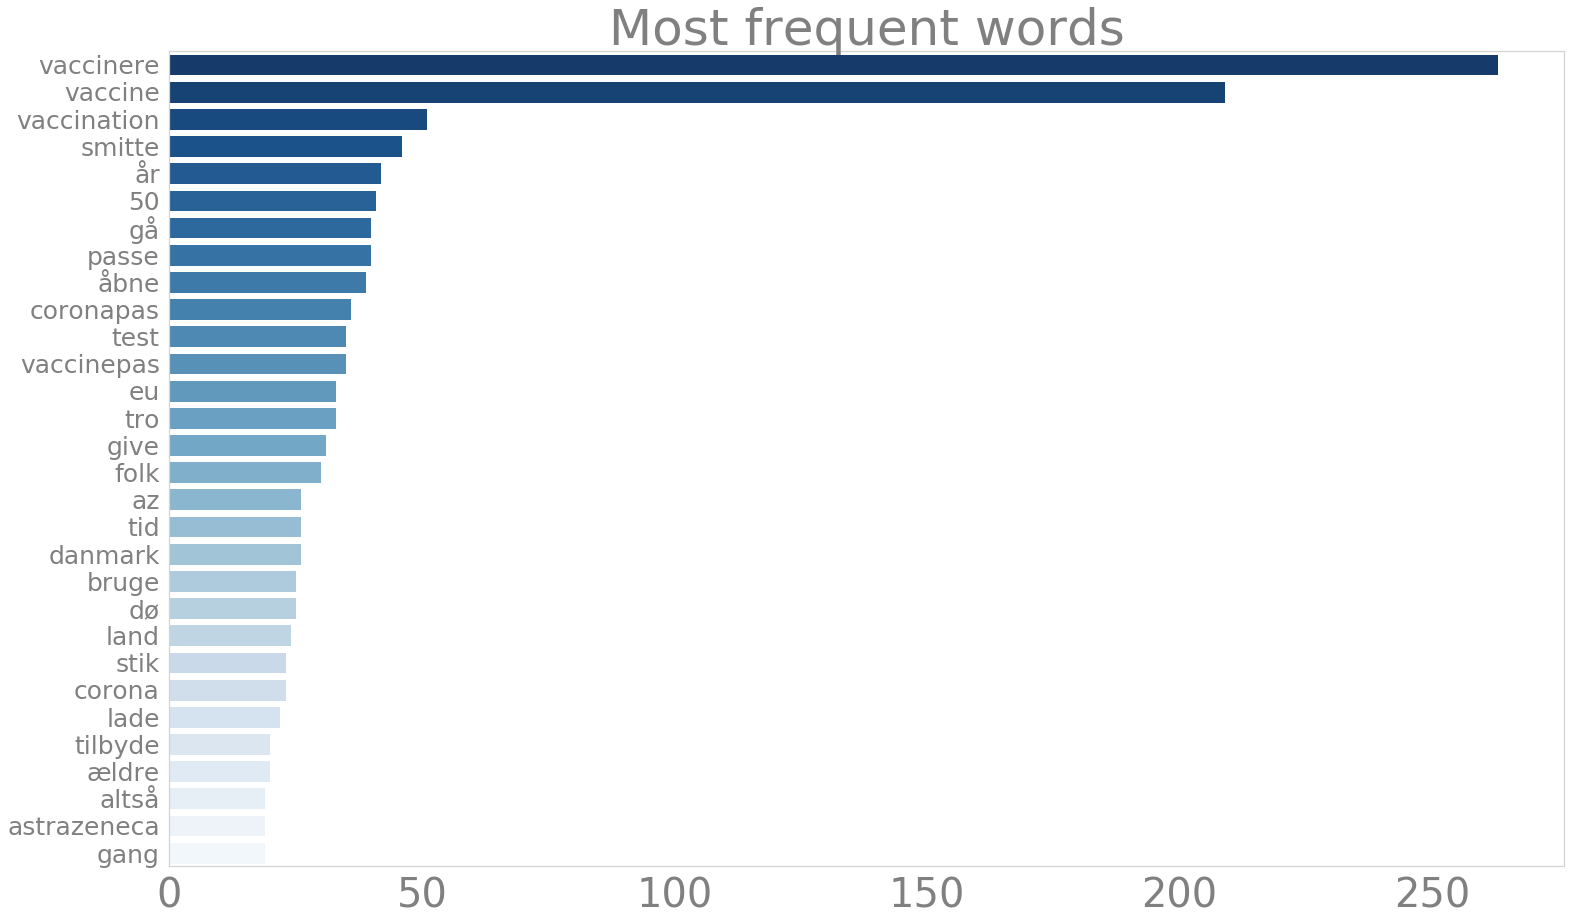

In [63]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import pyplot_themes as themes

word_freq = word_freq[~word_freq["word"].isin(stop_words)]
df0 = word_freq.nlargest(30, columns=['Frequency'])
nr_hash = len(df0["word"].unique())

matplotlib.rc('ytick', labelsize=30)
matplotlib.rc('xtick', labelsize=30)

themes.theme_minimal(grid=False, ticks=False, fontsize=18)
a4_dims = (25,15) #(11.7, 8.27)

fig, (ax) = plt.subplots(1,1, figsize=a4_dims)

themes.theme_minimal(grid=False, ticks=False, fontsize=18)
palette = sns.color_palette("Blues_r", nr_hash)

ax = sns.barplot(y="word", x="Frequency", palette = palette, data = df0)

ax.set(xlabel="Count", ylabel = "Hashtag")
ax.xaxis.get_label().set_fontsize(25)
ax.yaxis.get_label().set_fontsize(25)
ax.axes.set_title("Most frequent words",fontsize=50)

plt.xticks(fontsize=40)
plt.yticks(fontsize=25)

ax.set(xlabel="", ylabel = "")
ax.xaxis.get_label().set_fontsize(100)
ax.yaxis.get_label().set_fontsize(40)

#plot_name = "fig/word_frequency.png"
#fig.savefig(plot_name)

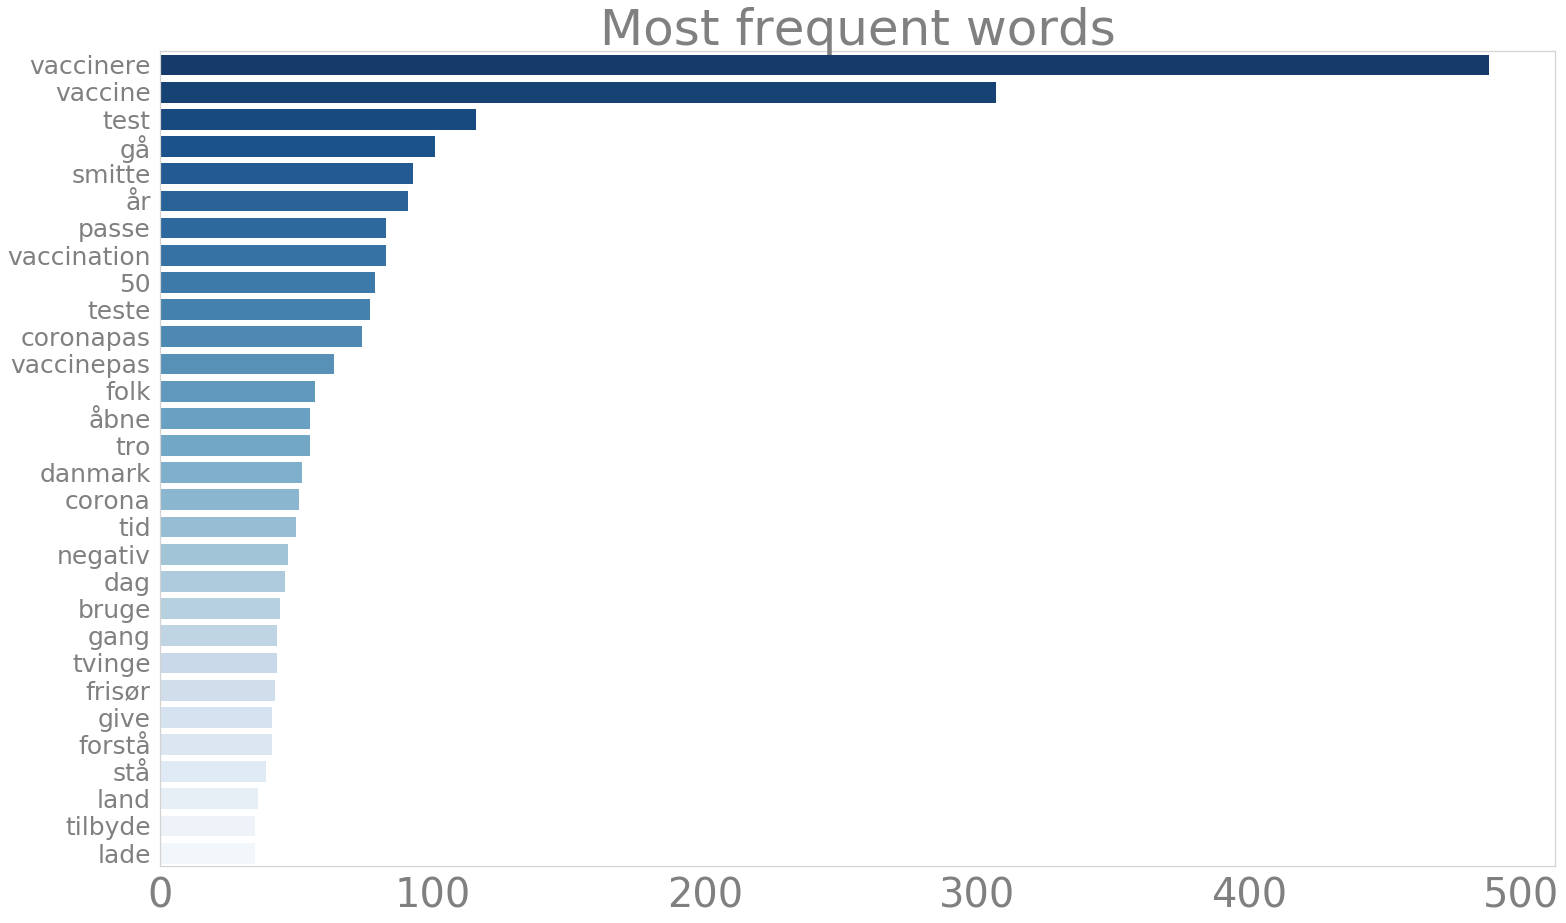

In [64]:
sub = winter_df[winter_df["date"] == "2021-03-23"].reset_index()
sub["tokens_list"] = sub.apply(lambda row: lemmas(row), axis = 1)
sub["tokens_string"] = sub.apply(lambda row: join_tokens(row), axis = 1)
#texts = freq_df["tokens_string"]
word_freq = sub.tokens_string.str.split(expand=True).stack().value_counts()
word_freq = word_freq.to_frame().reset_index().rename(columns={"index": "word", 0: "Frequency"})


word_freq = word_freq[~word_freq["word"].isin(stop_words)]
df0 = word_freq.nlargest(30, columns=['Frequency'])
nr_hash = len(df0["word"].unique())

matplotlib.rc('ytick', labelsize=30)
matplotlib.rc('xtick', labelsize=30)

themes.theme_minimal(grid=False, ticks=False, fontsize=18)
a4_dims = (25,15) #(11.7, 8.27)

fig, (ax) = plt.subplots(1,1, figsize=a4_dims)

themes.theme_minimal(grid=False, ticks=False, fontsize=18)
palette = sns.color_palette("Blues_r", nr_hash)

ax = sns.barplot(y="word", x="Frequency", palette = palette, data = df0)

ax.set(xlabel="Count", ylabel = "Hashtag")
ax.xaxis.get_label().set_fontsize(25)
ax.yaxis.get_label().set_fontsize(25)
ax.axes.set_title("Most frequent words",fontsize=50)

plt.xticks(fontsize=40)
plt.yticks(fontsize=25)

ax.set(xlabel="", ylabel = "")
ax.xaxis.get_label().set_fontsize(100)
ax.yaxis.get_label().set_fontsize(40)

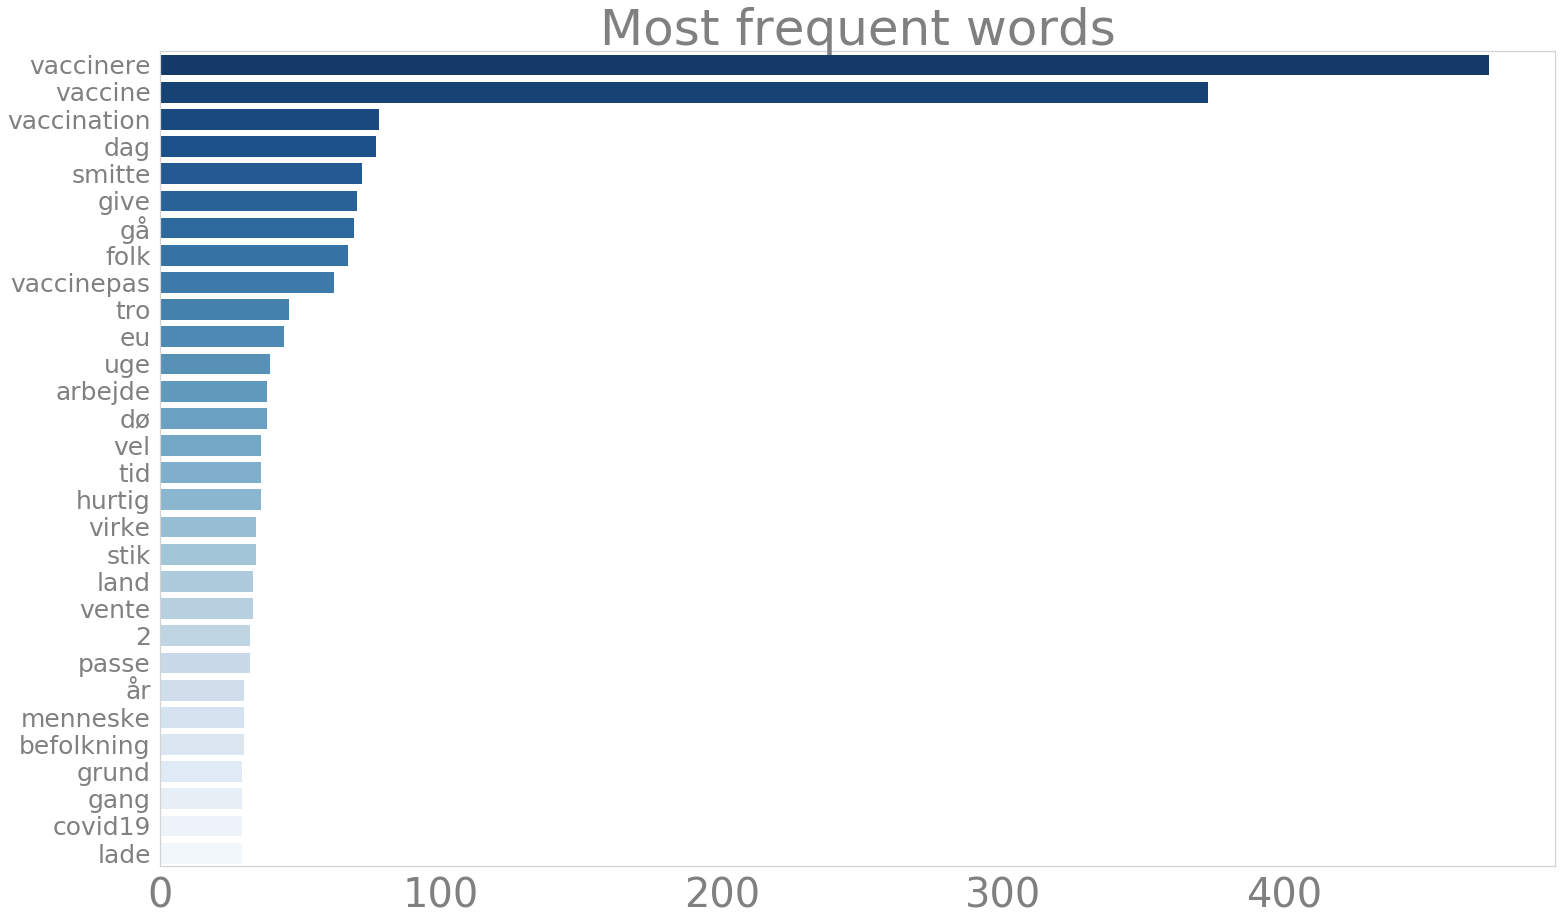

In [65]:
sub = winter_df[winter_df["date"] == "2021-01-13"].reset_index()
sub["tokens_list"] = sub.apply(lambda row: lemmas(row), axis = 1)
sub["tokens_string"] = sub.apply(lambda row: join_tokens(row), axis = 1)
#texts = freq_df["tokens_string"]
word_freq = sub.tokens_string.str.split(expand=True).stack().value_counts()
word_freq = word_freq.to_frame().reset_index().rename(columns={"index": "word", 0: "Frequency"})


word_freq = word_freq[~word_freq["word"].isin(stop_words)]
df0 = word_freq.nlargest(30, columns=['Frequency'])
nr_hash = len(df0["word"].unique())

matplotlib.rc('ytick', labelsize=30)
matplotlib.rc('xtick', labelsize=30)

themes.theme_minimal(grid=False, ticks=False, fontsize=18)
a4_dims = (25,15) #(11.7, 8.27)

fig, (ax) = plt.subplots(1,1, figsize=a4_dims)

themes.theme_minimal(grid=False, ticks=False, fontsize=18)
palette = sns.color_palette("Blues_r", nr_hash)

ax = sns.barplot(y="word", x="Frequency", palette = palette, data = df0)

ax.set(xlabel="Count", ylabel = "Hashtag")
ax.xaxis.get_label().set_fontsize(25)
ax.yaxis.get_label().set_fontsize(25)
ax.axes.set_title("Most frequent words",fontsize=50)

plt.xticks(fontsize=40)
plt.yticks(fontsize=25)

ax.set(xlabel="", ylabel = "")
ax.xaxis.get_label().set_fontsize(100)
ax.yaxis.get_label().set_fontsize(40)